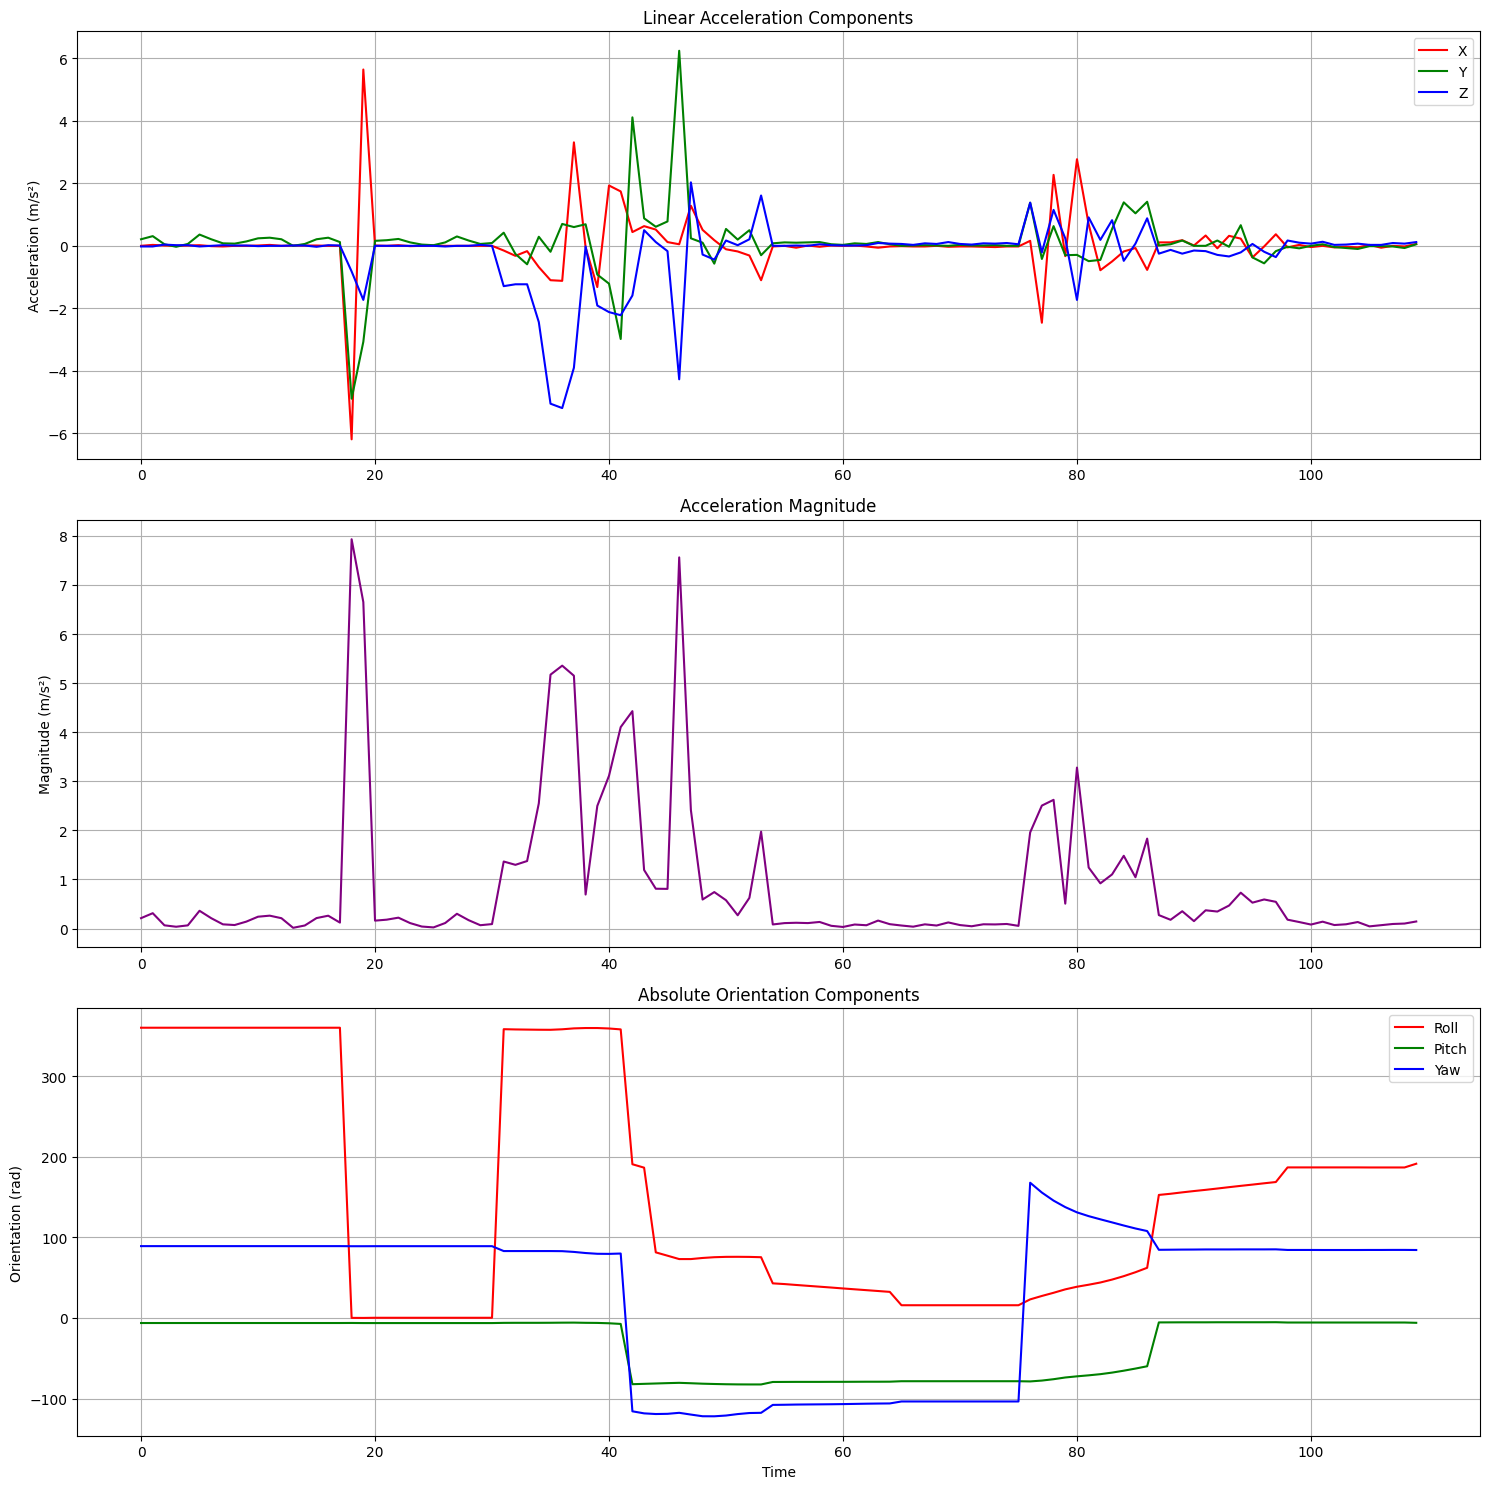


Basic Statistics:
       acceleration_magnitude
count              110.000000
mean                 0.907025
std                  1.592261
min                  0.014142
25%                  0.086023
50%                  0.210119
75%                  0.809690
max                  7.930990


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from general import *

# Load the data
data = pd.read_csv('sessions/sideFalls/S36.csv')

# Compute acceleration magnitude
def compute_acceleration_magnitude(ax, ay, az):
    return np.sqrt(ax**2 + ay**2 + az**2)

# Generate time axis
time = range(len(data))

# Calculate magnitude
data["acceleration_magnitude"] = compute_acceleration_magnitude(
    data['linear_acceleration[0]'],
    data['linear_acceleration[1]'],
    data['linear_acceleration[2]']
)

# Create 3x1 subplot
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15))

# 1. Linear Acceleration Components
ax1.plot(time, data['linear_acceleration[0]'], label='X', color='r')
ax1.plot(time, data['linear_acceleration[1]'], label='Y', color='g')
ax1.plot(time, data['linear_acceleration[2]'], label='Z', color='b')
ax1.set_title('Linear Acceleration Components')
ax1.set_ylabel('Acceleration (m/s²)')
ax1.legend()
ax1.grid(True)

# 2. Acceleration Magnitude
ax2.plot(time, data['acceleration_magnitude'], color='purple')
ax2.set_title('Acceleration Magnitude')
ax2.set_ylabel('Magnitude (m/s²)')
ax2.grid(True)

# 3. Orientation Components
ax3.plot(time, data['absolute_orientation[0]'], label='Roll', color='r')
ax3.plot(time, data['absolute_orientation[1]'], label='Pitch', color='g')
ax3.plot(time, data['absolute_orientation[2]'], label='Yaw', color='b')
ax3.set_title('Absolute Orientation Components')
ax3.set_xlabel('Time')
ax3.set_ylabel('Orientation (rad)')
ax3.legend()
ax3.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Print basic statistics for acceleration
print("\nBasic Statistics:")
stats_columns = ['acceleration_magnitude']
print(data[stats_columns].describe())

In [18]:
import pandas as pd
import numpy as np

def crop_dataset(file_path, start_index, save_path=None):
    """
    Crop dataset from a specific starting index
    
    Args:
        file_path (str): Path to the original CSV file
        start_index (int): Index to start from
        save_path (str, optional): Path to save the cropped CSV. If None, won't save
    
    Returns:
        pd.DataFrame: Cropped dataset
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Crop from start_index
    cropped_df = df.iloc[start_index:]
    
    # Reset index
    cropped_df = cropped_df.reset_index(drop=True)
    
    # Save if path provided
    if save_path:
        cropped_df.to_csv(save_path, index=False)
        print(f"Saved cropped dataset to {save_path}")
    
    print(f"Original dataset length: {len(df)}")
    print(f"Cropped dataset length: {len(cropped_df)}")
    
    return cropped_df


cropped_data = crop_dataset(
        file_path='sessions/normal/S17.csv',
        start_index=40,
        save_path='dataset/normal/normal8.csv'
    )


Saved cropped dataset to dataset/normal/normal8.csv
Original dataset length: 103
Cropped dataset length: 63


In [26]:
import pandas as pd
import numpy as np
from pathlib import Path

def combine_sessions(file_paths):
    """
    Combine multiple CSV sessions into one dataset with session IDs
    
    Args:
        file_paths (list): List of paths to CSV files
    
    Returns:
        pd.DataFrame: Combined dataset with session IDs
    """
    combined_data = []
    
    for session_id, file_path in enumerate(file_paths):
        # Read the CSV
        df = pd.read_csv(file_path)
        
        # Add session identifier
        df['session_id'] = session_id
        df['fall'] = 0
        
        combined_data.append(df)
    
    # Combine all sessions
    combined_df = pd.concat(combined_data, ignore_index=True)
    
    return combined_df

# Example usage:
training_files = [
    'dataset/normal/normal1.csv',
    'dataset/normal/normal2.csv',
    'dataset/normal/normal3.csv',
    'dataset/normal/normal4.csv',
    'dataset/normal/normal5.csv',
    'dataset/normal/normal6.csv',
    'dataset/normal/normal7.csv',
    'dataset/normal/normal8.csv'
]

# Combine all sessions
combined_dataset = combine_sessions(training_files)

# Save combined dataset
combined_dataset.to_csv('dataset/combined_training_data.csv', index=False)

print(f"Total samples in combined dataset: {len(combined_dataset)}")
print(f"Unique sessions: {combined_dataset['session_id'].nunique()}")
print("\nSamples per session:")
print(combined_dataset.groupby('session_id').size())

Total samples in combined dataset: 501
Unique sessions: 8

Samples per session:
session_id
0    82
1    63
2    42
3    78
4    53
5    60
6    60
7    63
dtype: int64


In [49]:
import pandas as pd
import numpy as np

def crop_dataset(file_path, start_index, fall_start, fall_end, save_path=None):
    """
    Crop dataset and add fall labels based on a range
    
    Args:
        file_path (str): Path to the original CSV file
        start_index (int): Index to start from
        fall_start (int): Start index of fall event (relative to cropped data)
        fall_end (int): End index of fall event (relative to cropped data)
        save_path (str, optional): Path to save the cropped CSV. If None, won't save
    
    Returns:
        pd.DataFrame: Cropped dataset with fall labels
    """
    # Read the CSV file
    df = pd.read_csv(file_path)
    
    # Crop from start_index
    cropped_df = df.iloc[start_index:]
    
    # Reset index
    cropped_df = cropped_df.reset_index(drop=True)
    
    # Add fall label column (initialize all to 0)
    cropped_df['fall'] = 0
    
    # Set fall=1 for the specified range
    cropped_df.loc[fall_start:fall_end, 'fall'] = 1
    
    # Save if path provided
    if save_path:
        cropped_df.to_csv(save_path, index=False)
        print(f"Saved cropped dataset to {save_path}")
    
    print(f"Original dataset length: {len(df)}")
    print(f"Cropped dataset length: {len(cropped_df)}")
    print(f"Number of fall samples: {cropped_df['fall'].sum()}")
    
    return cropped_df

# Example usage:
cropped_data = crop_dataset(
    file_path='sessions/sideFalls/S36.csv',
    start_index=20,
    fall_start=15,
    fall_end=35,
    save_path='dataset/falls/s2.csv'
)

# Print fall distribution
print("\nFall label distribution:")
print(cropped_data['fall'].value_counts())

Saved cropped dataset to dataset/falls/s2.csv
Original dataset length: 110
Cropped dataset length: 90
Number of fall samples: 21

Fall label distribution:
fall
0    69
1    21
Name: count, dtype: int64


In [50]:
import pandas as pd
import numpy as np
from pathlib import Path

def combine_sessions(file_paths, start_session_id=8):
    """
    Combine multiple CSV sessions into one dataset with session IDs
    
    Args:
        file_paths (list): List of paths to CSV files
        start_session_id (int): Starting number for session IDs
    
    Returns:
        pd.DataFrame: Combined dataset with session IDs
    """
    combined_data = []
    
    for i, file_path in enumerate(file_paths):
        # Read the CSV
        df = pd.read_csv(file_path)
        
        # Add session identifier starting from start_session_id
        df['session_id'] = start_session_id + i
        
        combined_data.append(df)
    
    # Combine all sessions
    combined_df = pd.concat(combined_data, ignore_index=True)
    
    return combined_df

# Example usage:
training_files = [
    'dataset/falls/b1.csv',
    'dataset/falls/b2.csv',
    'dataset/falls/b3.csv',
    'dataset/falls/f1.csv',
    'dataset/falls/f2.csv',
    'dataset/falls/f3.csv',
    'dataset/falls/s1.csv',
    'dataset/falls/s2.csv'
]

# Combine all sessions starting from session_id 8
combined_dataset = combine_sessions(training_files, start_session_id=8)

# Save combined dataset
combined_dataset.to_csv('dataset/combined_falls.csv', index=False)

print(f"Total samples in combined dataset: {len(combined_dataset)}")
print(f"Unique sessions: {combined_dataset['session_id'].nunique()}")
print("\nSamples per session:")
print(combined_dataset.groupby('session_id').size())

Total samples in combined dataset: 666
Unique sessions: 8

Samples per session:
session_id
8      75
9     100
10     70
11    126
12     64
13     57
14     84
15     90
dtype: int64
